# Homework 4: Hypothesis Testing and Correlation

**Due**: Tuesday May 2nd

### HW Logistics

- **Release**: Every week there will be a HW assignment released on *Wednesday* and due the following *Tuesday at 11:59pm*. 
Homework will be posted to the course website. 
- **Format**: We expect students to complete the homework notebooks using Google Colab (see Discussion 1), but this is not explicitly required and you may use whatever software you would like to run notebooks. 
- **Answers**: As a general guiding policy, you should always try to make it as clear as possible what your answer to each question is, and how you arrived at your answer. Generally speaking, this will mean including all code used to generate results, outputting the actual results to the notebook, and (when necessary) including written answers to support your code.
- **Submission**: Homeworks will be *submitted to Gradescope*, and we expect all students to do question matching on Gradescope upon submission.
- **Late Policy**: All students are allowed 7 total slip days for the quarter, and at most 5 can be used for a single HW assignment. There will be no late credit if you have used up all your slip days. Also, your lowest HW grade will be dropped.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

## Question 1: Clickthrough Rates

We will revisit the problem of clickthrough rates from Homework 3. Your company believes that an advertisement is successful if the clickthrough rate is greater than 30%. For the current ad on the website, the company has collected data for 50 website visitors, of which 18 have clicked on the ad. You would like to use your data to assess if the current ad is successful or not.

**Part (a)**: Formulate a hypothesis test to formally test if the current ad is successful by stating the null and alternative hypotheses of the test. Is your hypothesis test a one-sided or two-sided hypothesis test?

*Null hypothesis*: The clickthrough rate is equal to 0.30.

*Alternative hypothesis*: The clickthrough rate is greater than 0.30.

This is a one-sided test.

**Part (b)**: Generate 1000 samples, each of size n=50, from the distribution described in your null hypothesis. For each sample, generate a point estimate of the clickthrough rate for that sample. Plot a histogram of the resulting null sampling distribution.

<Axes: ylabel='Count'>

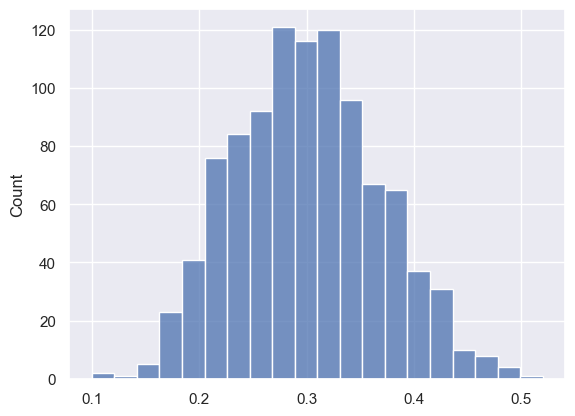

In [9]:
# set seed
np.random.seed(10)

# -------- Code here --------- #

p_null = 0.30
B = 1000
n = 50
estimates = np.zeros(B)

data = pd.DataFrame({
    "outcome": ["clicked", "not clicked"],
    "prob": [p_null, 1 - p_null]
})
for i in range(B):
    sample = data.sample(n=n, weights="prob", replace=True)
    estimates[i] = sample.groupby("outcome").size()["clicked"] / n

sns.histplot(x=estimates, bins=20)


**Part (c)**: Using your null sampling distribution from part (b) and the data observed by the company, generate 2 p-values for your hypothesis test, one using the normal approximation method and one using the percentile method. Are the p-values meaningfully different? Give an explanation why or why not this is the case.

In [15]:
p_obs = 18 / 50

# Generating one-sided p-values
p_val_norm_approx = 1-stats.norm.cdf(p_obs, loc=estimates.mean(), scale=estimates.std())
print(f"P value from normal approximation: {np.round(p_val_norm_approx, 4)}")
p_val_percentile = np.mean(estimates >= p_obs)
print(f"P value from percentile: {np.round(p_val_percentile, 4)}")

P value from normal approximation: 0.1813
P value from percentile: 0.223


The p-values are siginficantly different. You'll notice that the percentile method gives a larger p-value than the normal approximation when using >=, but gives a smaller p-value than the normal approximation when using > (even though both are valid). This is because each sample only has n=50 data points, so the point estimates only take on 1 of 50 unique values, and thus there is a nontrivial subset of point estimates that exactly equal 18 / 50. Therefore, there is significant difference between using >= and > in the percentile method, and the normal approximation method is roughly halfway in between these two options. This would not be the case if n was larger.

**Part (d)**: Using the normal approximation p-value from part (c), make a conclusion about your hypothesis test from part (a), using a significance level of $\alpha = 0.05$. Make sure to give an interpretation of your conclusion in the context of the business problem.

The p-value (using the normal approximation approach) is greater than 0.05; thus we do not have enough evidence to reject the null hypothesis. In context, this means that we cannot conclude that the clickthrough rate is greater than 0.30. 

**Part (e)**: Explain the concept of a false positive and a false negative in the context of this problem. Which error do you think is worse in this context?

False positive: concluding that the clickthrough rate is greater than 0.30, i.e. that the ad is successful, when in reality it is not. 

False negative: failing to conclude that the clickthrough rate is greater than 0.30, when in reality it is.

You could make an argument that either is worse in this context. I would argue that a false positive is worse, because in this case we think that an unsuccessful ad is actually successful, which means that we will likely not replace the ad with a potentially better performing ad for a substantial period of time. 

## Question 2: Comparing Median Incomes

We will return to the census data used in homework 1. Specifically, we will test if men and women have different median incomes. The following code will read in the data.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/homework/main/data/census_corrected.csv")

**Part (a)**: Why does it make sense to compare the median incomes of men and women, instead of comparing the means?

The data is very right-skewed, which adversely affects the mean (makes the mean higher than expected), which makes the median a better metric.

**Part (b)**: State the null and alternative hypothesis for testing whether or not men and women have the same median total family income. Is this a one-sided or two-sided hypothesis test?

*null hypothesis*: men and women have the same median family income.

*altnerative hypothesis*: men and women have different median family incomes.

This is a two-sided test.

**Part (c)**: Use sampling to conduct the hypothesis test you described in part (b) using $\alpha = 0.05$. Similar to Question 1, you will need to 1) generate a collection of point estimates (use 1000 samples) for the relevant sample statistic assuming the null hypothesis 2) generate a p-value (using the normal approximation method this time), and 3) make a conclusion based on your p-value, including an interpretation in the context of the problem.

In [13]:
# set seed
np.random.seed(10)

# -------- Code here --------- #

B = 1000
n = data.shape[0]
estimates = np.zeros(B)
for i in range(B):
    sample = pd.DataFrame({
        'sex': data["sex"].values,
        'income': data.sample(n=n, replace=True)['total_family_income'].values
    })
    medians = sample.groupby("sex")["income"].median()
    estimates[i] = medians["Male"] - medians["Female"]

obs_medians = data.groupby("sex")["total_family_income"].median()
obs_estimate = obs_medians["Male"] - obs_medians["Female"]

# Generate two-sided p-value
p_val = 2 * (1-stats.norm.cdf(obs_estimate, loc=0, scale=estimates.std())) # also fine to use 0 as loc
print(f"P value from normal approximation: {np.round(p_val, 4)}")

P value from normal approximation: 0.5333


The p-value is much greater than 0.05, do we do not have enough evidence to reject the null hypothesis, and thus cannot conclude that men and women have significantly different total family incomes.

**Part (d)**: Using the same null distribution as in part (c), what is the minimum difference in median income between men and women that would allow us to reject the null hypothesis, at a $\alpha=0.05$ significance level?

In [15]:
# Use the 0.975 quantile because it's two-sided
cutoff = stats.norm.ppf(0.975, loc=0, scale=estimates.std())
print(f"Minimum difference to be able to reject: {np.round(cutoff, 4)}")

Minimum difference to be able to reject: 6920.9488
